In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv("winequality-red.csv")

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Kütüphaneler tanımlandı ve ilk gözlem yapıldı.

In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Veri seti yapısal olarak kontrol edildi

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
#Boş değerlerde gözlem yapıldı.

<AxesSubplot:>

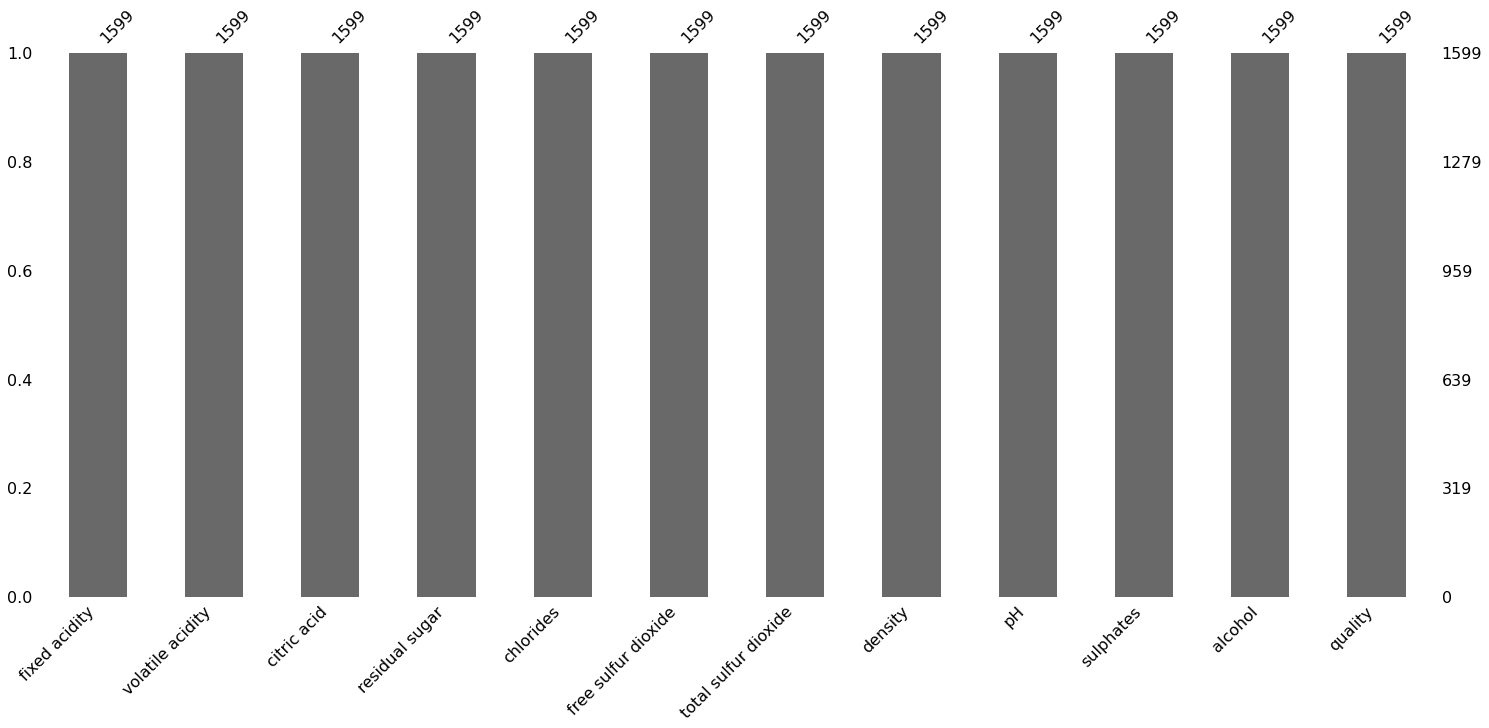

In [10]:
msno.bar(df)

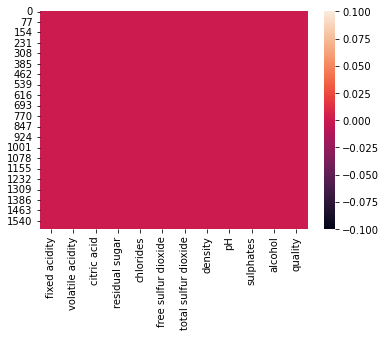

In [11]:
sns.heatmap(df.isnull());

In [12]:
#Boş olan değerler grafik üzerinden kontrol edildi.

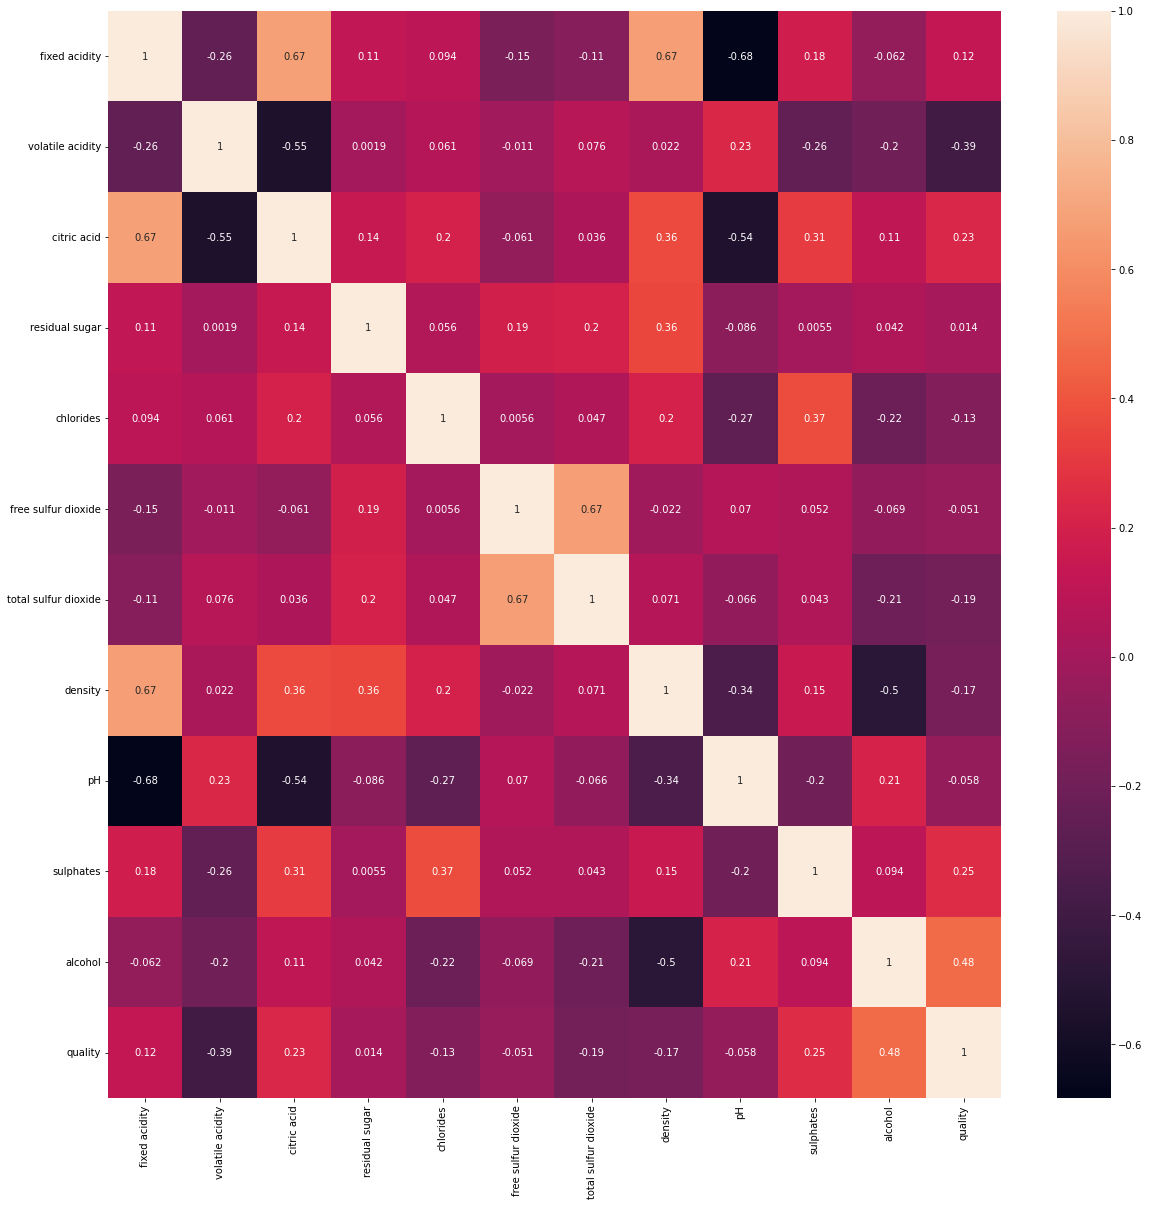

In [13]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
correlations.round(2);

In [14]:
#Korelasyon ilişkilerine bakıldı.

In [15]:
df.corr().nlargest(4,"quality").index

Index(['quality', 'alcohol', 'sulphates', 'citric acid'], dtype='object')

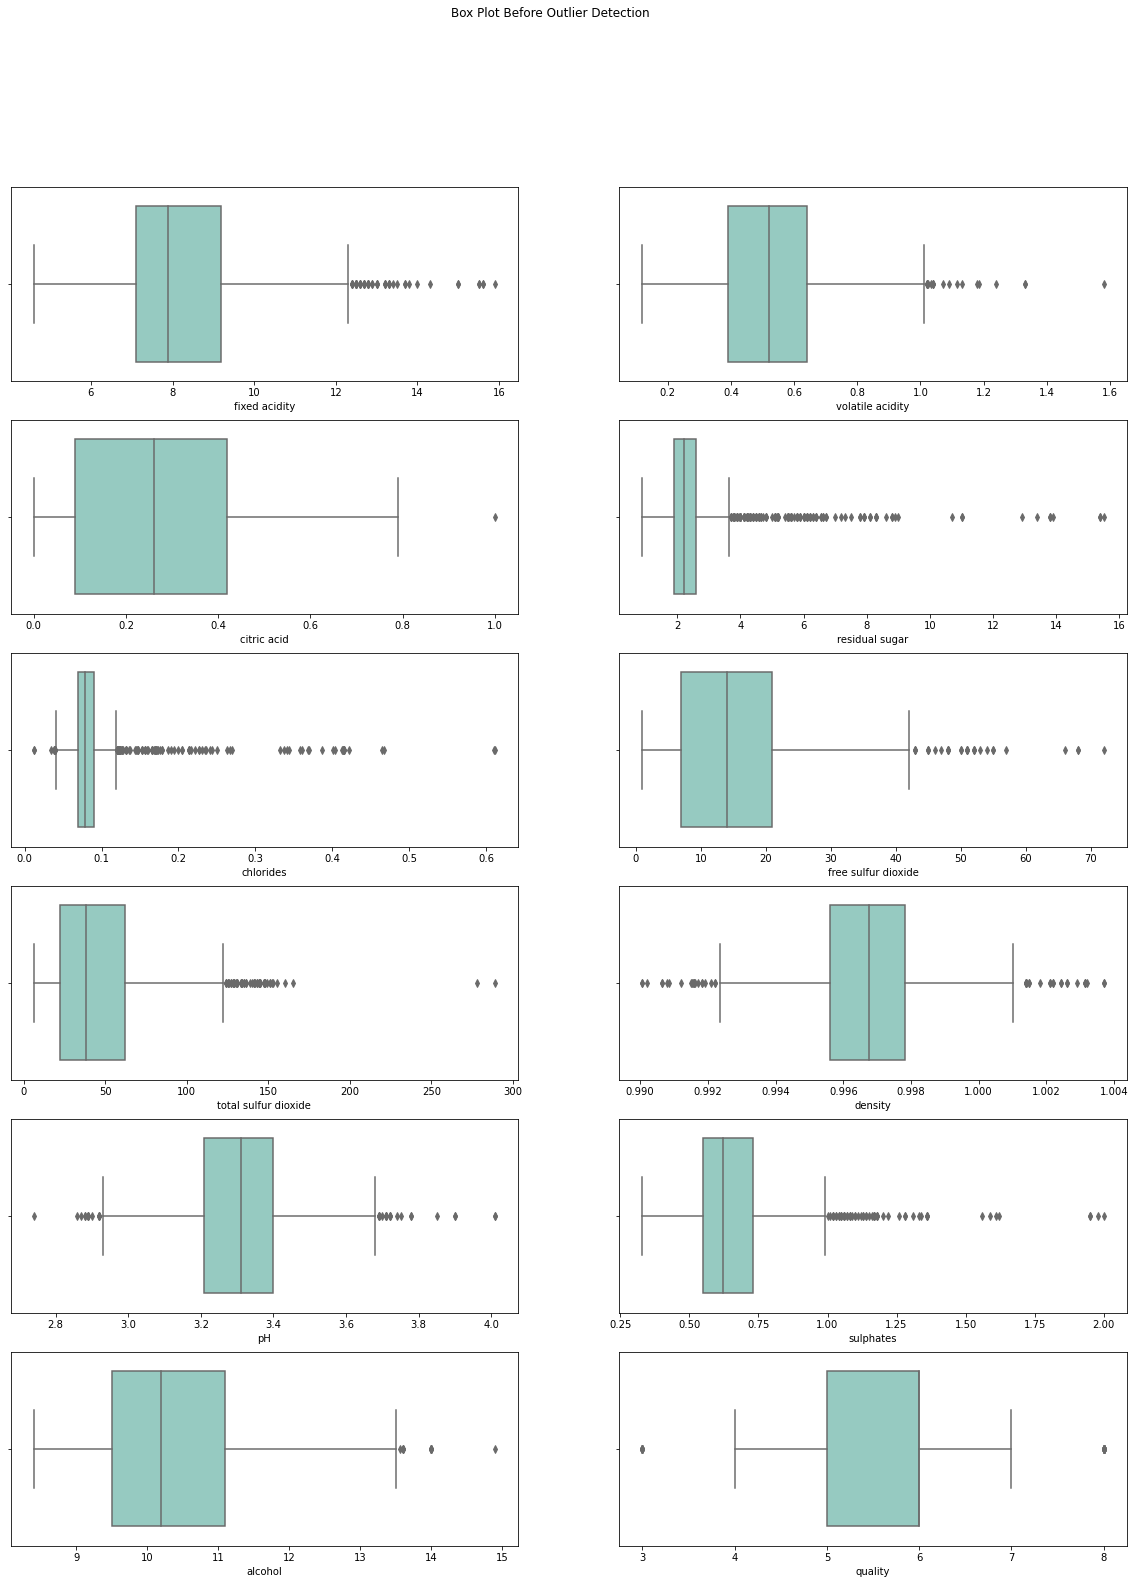

In [16]:
fig, axes = plt.subplots(6,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,6):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=df.columns[k], palette='Set3')
        k=k+1

In [17]:
#Değerler aykırı gözlem saptanmak için grafiğe aktarıldı.

In [18]:
main_df = df

In [19]:
#Aykırı değer hesaplama fonksiyonu oluşturdum 

In [20]:
def iqr_calculation(main_df,col):
    Q1 = np.percentile(col,25,interpolation = 'midpoint')
    Q3 = np.percentile(col,75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(col>=(Q3+1.5*IQR))
    lower = np.where(col<=(Q1-1.5*IQR))
    return upper,lower


In [21]:
#Aykırı değer silme fonksiyonu oluşturdum.

In [22]:
def remove_outliers(main_df,upper,lower):
    main_df.drop(upper[0], inplace = True)
    main_df.drop(lower[0], inplace = True)
    print("New Shape: ", main_df.shape)
    return main_df

In [23]:
#Bulunan aykırı değerin oluşturdum fonksiyonlar sayesinde index numarasına göre sildim veher seferinde resetleme işlemi yaptım.

In [24]:
def reset_dataframe(main_df):
    main_df.reset_index(inplace=True)
    main_df.drop(columns=['index'],inplace=True)
    return main_df 

In [25]:
#Aykırı değerler silindikten sonra yeni oluşan verilerimin şeklini belirttim.

In [26]:
for i in range(0,len(main_df.columns)-1):
    print('For ',df.columns[i])
    upper, lower = iqr_calculation(main_df,df[df.columns[i]])
    main_df = remove_outliers(main_df,upper,lower)
    df_final = reset_dataframe(main_df)

For  fixed acidity
New Shape:  (1550, 12)
For  volatile acidity
New Shape:  (1530, 12)
For  citric acid
New Shape:  (1529, 12)
For  residual sugar
New Shape:  (1391, 12)
For  chlorides
New Shape:  (1289, 12)
For  free sulfur dioxide
New Shape:  (1263, 12)
For  total sulfur dioxide
New Shape:  (1213, 12)
For  density
New Shape:  (1186, 12)
For  pH
New Shape:  (1166, 12)
For  sulphates
New Shape:  (1139, 12)
For  alcohol
New Shape:  (1134, 12)


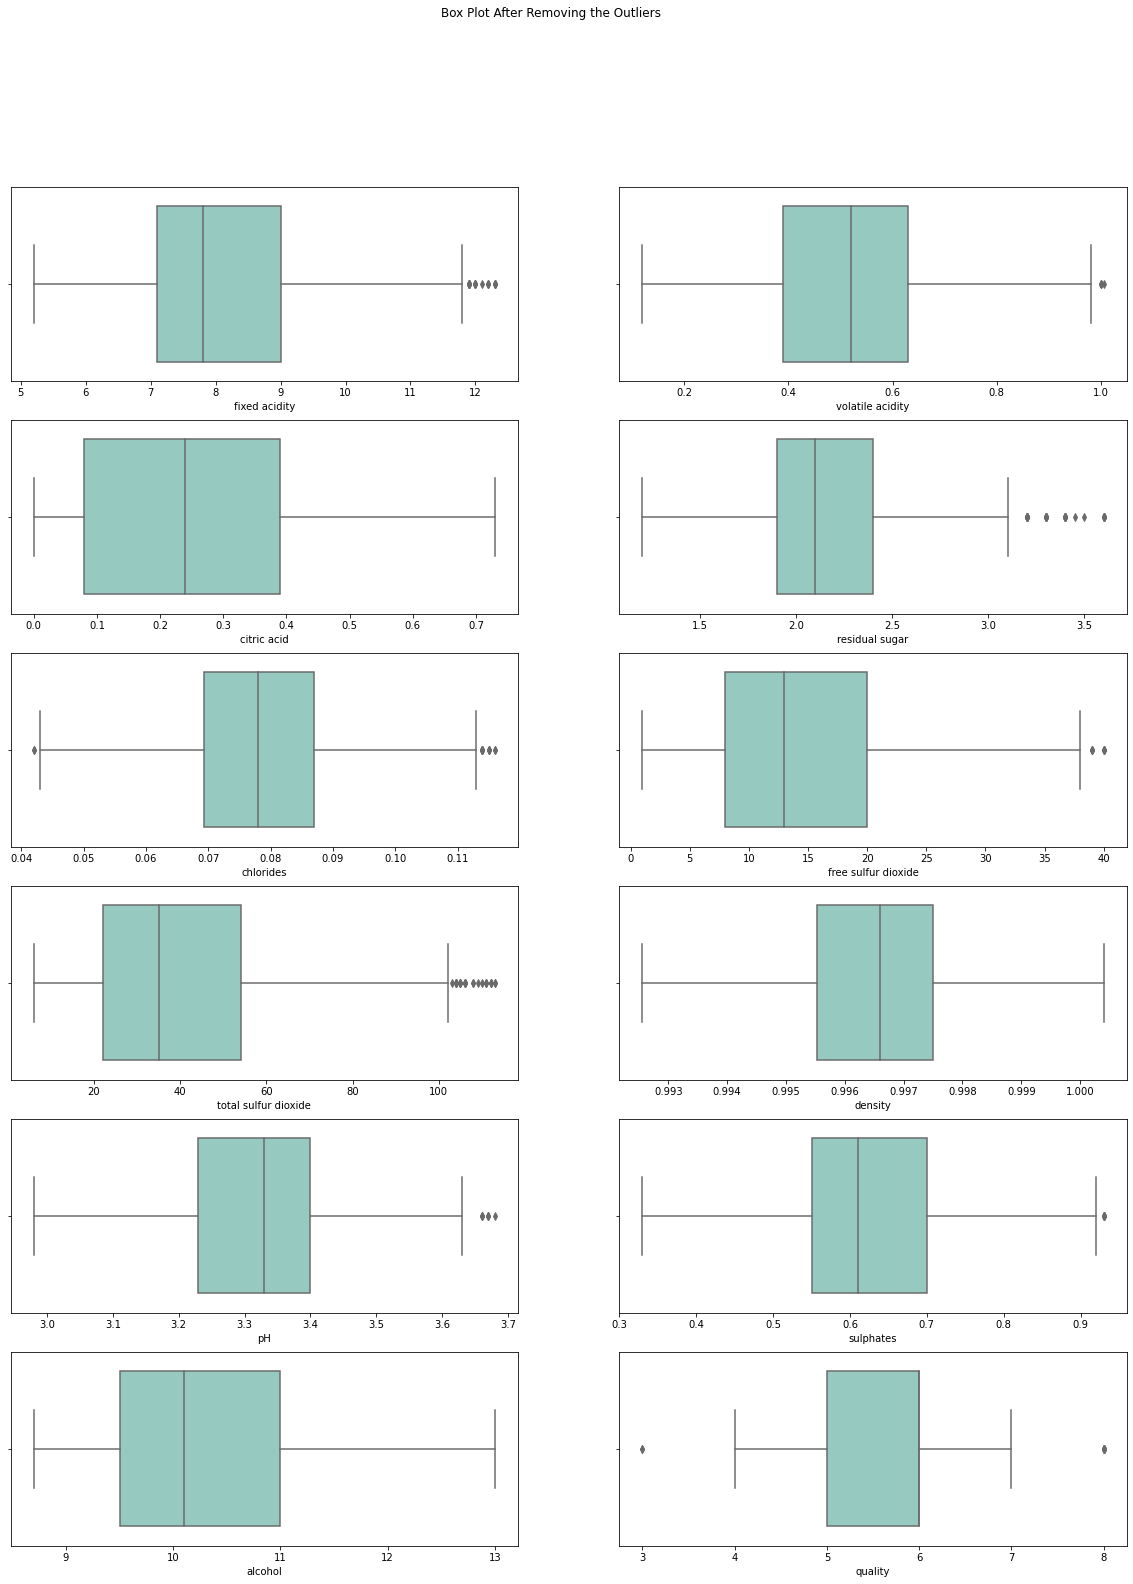

In [27]:
fig, axes = plt.subplots(6,2, figsize=(20,25))
fig.suptitle('Box Plot After Removing the Outliers')
k = 0
for i in range(0,6):
    for j in range(0,2):
        col_name = df_final.columns[k]
        sns.boxplot(ax=axes[i,j], data=df_final,x=col_name,palette='Set3')
        k=k+1

In [28]:
#Yeni oluşturduğum veri setinin grafiğine baktım.

In [29]:
y = df_final["quality"]
X= df_final.drop(["quality"], axis=1).astype("float64")

In [30]:
#Test train işlemi yaparak verimi ayırdım .

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (850, 11)
y_train (850,)
X_test (284, 11)
y_test (284,)
training (1134, 12)


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA(3)

In [33]:
#pca uygulayarak verini 3 boyuta indirgedim ve %61.31 lik bir doğruluk payı elde ettim

In [34]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train .shape

(850, 3)

In [35]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([25.84, 45.85, 61.31])

In [36]:
# LinearRegression modelini oluşturdum

In [37]:
lm = LinearRegression()

In [38]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [39]:
pcr_model.intercept_

5.628235294117647

In [40]:
pcr_model.coef_

array([0.06260528, 0.27389348, 0.12109562])

In [41]:
y_pred = pcr_model.predict(X_reduced_train)

In [42]:
y_pred[0:5]

array([5.20707482, 6.10000067, 5.14457981, 5.4855387 , 5.61684813])

In [43]:
#indirgenmiş verinin sapma değeri bulundu.

In [44]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.620704670274781

In [45]:
df["quality"].mean()

5.635802469135802

In [46]:
r2_score(y_train, y_pred)

0.3430923556111283

In [47]:
pca2 = PCA(3)

In [48]:
X_reduced_test = pca2.fit_transform(scale(X_test))
X_reduced_test.shape

(284, 3)

In [49]:
y_pred = pcr_model.predict(X_reduced_test)

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6354621092197282

In [51]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.6354621092197282


In [52]:
#sapma payı hesaplandı.

In [53]:
from sklearn import model_selection

In [54]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [55]:
lm = LinearRegression()

In [56]:
RMSE = []

In [57]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

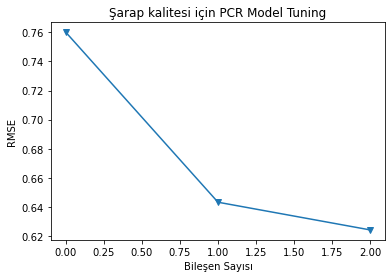

In [58]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Şarap kalitesi için PCR Model Tuning');

In [59]:
#hatanın boyutlara göre gösterilmesi .

In [60]:
lm = LinearRegression()

In [61]:
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)

pcr_model

LinearRegression()

In [62]:
y_pred = pcr_model.predict(X_reduced_train[:,0:10])
X_reduced_train.shape


(850, 3)

In [63]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

0.620704670274781


In [64]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
X_reduced_test.shape

(284, 3)

In [65]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.6354621092197282


In [66]:
#kurulan LinearRegression algoritması sapma değeri.

In [67]:
#KNN-veri setini train ve test olarak ayırdım.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [69]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [70]:
lm = LinearRegression()

In [71]:
knn_model

KNeighborsRegressor()

In [72]:
y_pred = knn_model.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.7177821867430493

In [74]:
#knn modeline göre sapma değeri.

In [75]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.4032952501871668
k = 3 için RMSE değeri:  0.49069778247460033
k = 4 için RMSE değeri:  0.5441534169482634
k = 5 için RMSE değeri:  0.5782326012743233
k = 6 için RMSE değeri:  0.5933729883201406
k = 7 için RMSE değeri:  0.606210356558315
k = 8 için RMSE değeri:  0.6195052580131039
k = 9 için RMSE değeri:  0.6328917162307413
k = 10 için RMSE değeri:  0.6374489598945066


In [76]:
knn_model = KNeighborsRegressor().fit(X_reduced_train, y_train)


In [77]:
#knn modelinde ki komşu sayısı değişimiyle hatanın değişimi gözlendi.

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [80]:
knn = KNeighborsRegressor()

In [81]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [82]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [83]:
knn_cv_model.best_params_["n_neighbors"]

11

In [84]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [85]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [86]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.6694351394197087

In [87]:
# knnn algoritmasıyla model kurularak doğu parmetre bulundu ve en iyi sapma değeri belirlendi.

In [88]:
##SVR (Destek Vektör Regresyonu)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [90]:
from sklearn.svm import SVR

In [91]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

In [92]:
y_pred = svr_rbf.predict(X_test)

In [93]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6712950277996568

In [94]:
#svr model ile sapma değeri bulundu.

In [95]:
svr_rbf

SVR()

In [96]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [97]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [98]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [99]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

0.6237720558243319

In [100]:
# svr algoritmasıyla model kurularak doğru parmetre bulundu ve en iyi sapma değeri belirlendi.

In [101]:
## yapay sinir ağı

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [105]:
X_train_scaled = scaler.transform(X_train)

In [106]:
X_test_scaled = scaler.transform(X_test)

In [107]:
from sklearn.neural_network import MLPRegressor

In [108]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [109]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [110]:
mlp_model.n_layers_

4

In [111]:
mlp_model.hidden_layer_sizes

(100, 20)

In [112]:
y_pred = mlp_model.predict(X_test_scaled)

In [113]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6389134919796107

In [114]:
#yapay sinir ağı ile sapma değeri bulundu.

In [115]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [116]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [117]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [118]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [119]:
mlp_cv_model.best_params_

{'activation': 'logistic',
 'alpha': 0.01,
 'hidden_layer_sizes': (300, 200, 150)}

In [120]:
mlp_tuned = MLPRegressor(alpha = 0.01, hidden_layer_sizes = (300, 200, 150))

In [121]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(300, 200, 150))

In [122]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [123]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6546882351965916

In [124]:
# yapay sinir ağı algoritmasıyla model kurularak doğru parmetre bulundu ve en iyi sapma değeri belirlendi.

In [125]:
#sınıflandırma ağacı

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [127]:
!pip install skompiler
from skompiler import skompile

In [128]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [129]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.8114497545907277

In [130]:
#sınıflandırma ağacı ile sapma değeri bulundu.

In [131]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [132]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [133]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [134]:
cart_cv_model.best_params_

{'max_leaf_nodes': 8, 'min_samples_split': 79}

In [135]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 8, min_samples_split = 79)

In [136]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=8, min_samples_split=79)

In [137]:
y_pred = cart_tuned.predict(X_test)

In [138]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6243867331378606

In [139]:
#sınıflandırma ağacı algoritmasıyla model kurularak doğru parmetre bulundu ve en iyi sapma değeri belirlendi.

In [140]:
Importance = pd.DataFrame({"Importance": cart_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

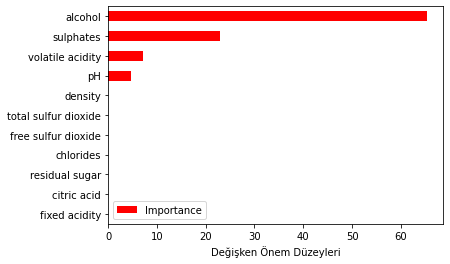

In [141]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [142]:
#bagged tree

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [144]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [145]:
bag_model.n_estimators


10

In [146]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=294818810),
 DecisionTreeRegressor(random_state=1611233790),
 DecisionTreeRegressor(random_state=1262356046),
 DecisionTreeRegressor(random_state=282819926),
 DecisionTreeRegressor(random_state=1852682337),
 DecisionTreeRegressor(random_state=107613021),
 DecisionTreeRegressor(random_state=172275916),
 DecisionTreeRegressor(random_state=623049843),
 DecisionTreeRegressor(random_state=1555643302),
 DecisionTreeRegressor(random_state=517673243)]

In [147]:
bag_model.estimators_samples_

[array([843, 232, 464, 245, 495, 138, 314, 209, 306, 770, 443, 360, 280,
        727, 147, 509, 365, 367, 589, 302, 166, 804, 401, 528, 339, 597,
        694,  15, 543, 400, 846, 740, 129, 575, 434,  33, 367, 433, 565,
        708,  41, 270, 631,  93, 281, 639, 154, 213, 720,  39, 475,  73,
         34, 725, 383, 547, 392, 496, 449, 153,  79, 572, 284, 785, 632,
        542, 226, 358, 625, 544, 841, 564, 517, 126, 815, 161, 267, 704,
        160, 559, 427, 446, 451, 340, 168, 714,  32, 818, 590,  17, 637,
         75, 293, 773,  46, 452, 282, 494, 454, 409, 346, 445, 525, 138,
        121, 122,  47, 666, 186,  68, 325, 317,  23, 489, 275, 455, 553,
        578, 185, 448, 733, 299, 279, 336, 559, 797, 142, 690, 725, 682,
        232, 189,  33,   6, 663, 656, 799, 531, 357, 605, 647, 145, 596,
         13, 363, 157, 331, 535, 287, 290, 747, 717, 776, 218, 356, 252,
        554,  93, 362, 255, 305, 829, 345, 259, 410, 183, 207, 616, 599,
        797, 677, 502, 161, 828, 171,  97, 158, 265

In [148]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1611233790)

In [149]:
y_pred = bag_model.predict(X_test)

In [150]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5721530869702421

In [151]:
#bagged tree ile sapma değeri bulundu.

In [152]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [153]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

0.8027242348298067

In [154]:
#bagged tree sabit parametre ile sapma değeri bulundu.

In [155]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [156]:
bag_params = {"n_estimators": range(2,20)}

In [157]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [158]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [159]:
bag_cv_model.best_params_

{'n_estimators': 18}

In [160]:
bag_tuned = BaggingRegressor( n_estimators = 17, random_state = 45)

In [161]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=17, random_state=45)

In [162]:
y_pred = bag_tuned.predict(X_test)

In [163]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.565638900585909

In [164]:
# bagged tree algoritmasıyla model kurularak doğru parmetre bulundu ve en iyi sapma değeri belirlendi.

In [165]:
#Random Forests

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
rf_model = RandomForestRegressor(random_state = 42)

In [169]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [170]:
rf_model.predict(X_test)[0:5]

array([6.98, 6.45, 5.25, 5.12, 6.28])

In [171]:
y_pred = rf_model.predict(X_test)

In [172]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5427249322747906

In [173]:
#Random Forest ile sapma değeri bulundu.

In [174]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [175]:
rf_model = RandomForestRegressor(random_state = 42)

In [176]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [177]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [178]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 5, 'n_estimators': 200}

In [179]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 5, 
                                 n_estimators =200)

In [180]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=5, n_estimators=200)

In [181]:
y_pred = rf_tuned.predict(X_test)

In [182]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5404122915466176

In [183]:
# Random Forest algoritmasıyla model kurularak doğru parmetre bulundu ve en iyi sapma değeri belirlendi.

In [184]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

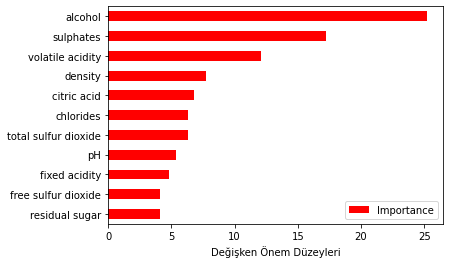

In [185]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [186]:
#Gradient Boosting Machines

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [188]:
from sklearn.ensemble import GradientBoostingRegressor

In [189]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [190]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5729302149723129

In [191]:
#Gradient Boosting Machines ile sapma değeri bulundu.

In [192]:
gbm_params = {
    'learning_rate': [ 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'n_estimators': [200, 2000],
    'subsample': [1,0.5,0.75],
}

In [193]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 8],
                         'n_estimators': [200, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [194]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 2000, 'subsample': 0.5}

In [195]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [196]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5666339407402485

In [197]:
# Gradient Boosting Machines algoritmasıyla model kurularak doğu parmetre bulundu ve en iyi sapma değeri belirlendi.

In [198]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

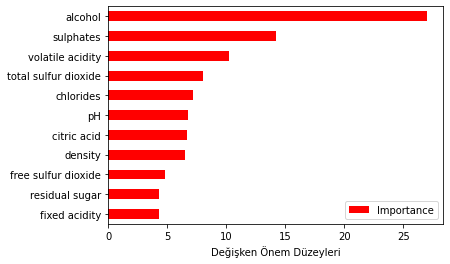

In [199]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [200]:
#XGBoost

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [202]:
!pip install xgboost

In [203]:
import xgboost as xgb

In [204]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [205]:
from xgboost import XGBRegressor

In [206]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [207]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.570208878389373

In [208]:
#XGBoost ile sapma değeri bulundu.

In [209]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [210]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5], 
     'n_estimators':[100,500, 1000],
     'max_depth': [2,5,6],
     'learning_rate': [0.01,0.5]
}


In [211]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [212]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 1000}

In [213]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.01, 
                         max_depth = 6, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [214]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5348524522587411

In [215]:
# XGBoost algoritmasıyla model kurularak doğu parmetre bulundu ve en iyi sapma değeri belirlendi.

In [216]:
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

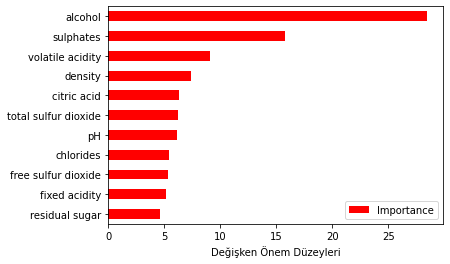

In [217]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [218]:
#CatBoost

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [220]:
!pip install catboost

In [221]:
from catboost import CatBoostRegressor

In [222]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.039905
0:	learn: 0.7564570	total: 146ms	remaining: 2m 25s
1:	learn: 0.7477137	total: 147ms	remaining: 1m 13s
2:	learn: 0.7380778	total: 148ms	remaining: 49.3s
3:	learn: 0.7294301	total: 150ms	remaining: 37.3s
4:	learn: 0.7213596	total: 151ms	remaining: 30s
5:	learn: 0.7139018	total: 152ms	remaining: 25.2s
6:	learn: 0.7064689	total: 153ms	remaining: 21.8s
7:	learn: 0.6989195	total: 155ms	remaining: 19.2s
8:	learn: 0.6920737	total: 156ms	remaining: 17.2s
9:	learn: 0.6861489	total: 157ms	remaining: 15.5s
10:	learn: 0.6803430	total: 158ms	remaining: 14.2s
11:	learn: 0.6735932	total: 160ms	remaining: 13.1s
12:	learn: 0.6685090	total: 161ms	remaining: 12.2s
13:	learn: 0.6629925	total: 162ms	remaining: 11.4s
14:	learn: 0.6576584	total: 164ms	remaining: 10.7s
15:	learn: 0.6529162	total: 165ms	remaining: 10.1s
16:	learn: 0.6485169	total: 166ms	remaining: 9.6s
17:	learn: 0.6438058	total: 168ms	remaining: 9.14s
18:	learn: 0.6395365	total: 169ms	remaining: 8.72s
19:	learn: 0

In [223]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5450217466041071

In [224]:
#CatBoostile sapma değeri bulundu.

In [225]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [3,4,5,6] }

In [226]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [227]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0:	learn: 0.7587611	total: 1.92ms	remaining: 1.92s
1:	learn: 0.7524480	total: 5.16ms	remaining: 2.57s
2:	learn: 0.7450241	total: 6.73ms	remaining: 2.24s
3:	learn: 0.7383022	total: 8.32ms	remaining: 2.07s
4:	learn: 0.7319329	total: 9.68ms	remaining: 1.93s
5:	learn: 0.7259419	total: 11.4ms	remaining: 1.89s
6:	learn: 0.7199685	total: 13.5ms	remaining: 1.91s
7:	learn: 0.7138122	total: 14.9ms	remaining: 1.85s
8:	learn: 0.7083650	total: 16.7ms	remaining: 1.84s
9:	learn: 0.7036014	total: 18.6ms	remaining: 1.84s
10:	learn: 0.6982181	total: 20.3ms	remaining: 1.82s
11:	learn: 0.6937073	total: 22.4ms	remaining: 1.84s
12:	learn: 0.6891551	total: 24ms	remaining: 1.82s
13:	learn: 0.6843277	total: 25.6ms	remaining: 1.8s
14:	learn: 0.6795768	total: 27.1ms	remaining: 1.78s
15:	learn: 0.6753310	total: 28.7ms	remaining: 1.76s
16:	learn: 0.6715382	total: 30ms	remaining: 1.74s
17:	learn: 0.6671675	total: 31.6ms	remaining: 1.72s
18:	learn: 0.6628

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020500BA6BE0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.1]},
             verbose=2)

In [228]:
catb_cv_model.best_params_

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.03}

In [229]:
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.03, 
                               depth = 6)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 0.7587611	total: 2.03ms	remaining: 2.03s
1:	learn: 0.7524480	total: 3.5ms	remaining: 1.75s
2:	learn: 0.7450241	total: 5ms	remaining: 1.66s
3:	learn: 0.7383022	total: 6.56ms	remaining: 1.63s
4:	learn: 0.7319329	total: 7.84ms	remaining: 1.56s
5:	learn: 0.7259419	total: 9.1ms	remaining: 1.51s
6:	learn: 0.7199685	total: 10.4ms	remaining: 1.48s
7:	learn: 0.7138122	total: 11.8ms	remaining: 1.46s
8:	learn: 0.7083650	total: 13.2ms	remaining: 1.45s
9:	learn: 0.7036014	total: 14.3ms	remaining: 1.42s
10:	learn: 0.6982181	total: 15.6ms	remaining: 1.4s
11:	learn: 0.6937073	total: 16.9ms	remaining: 1.39s
12:	learn: 0.6891551	total: 18.5ms	remaining: 1.4s
13:	learn: 0.6843277	total: 20.2ms	remaining: 1.42s
14:	learn: 0.6795768	total: 21.6ms	remaining: 1.42s
15:	learn: 0.6753310	total: 23.2ms	remaining: 1.43s
16:	learn: 0.6715382	total: 25.3ms	remaining: 1.46s
17:	learn: 0.6671675	total: 26.9ms	remaining: 1.47s
18:	learn: 0.6628280	total: 29.2ms	remaining: 1.51s
19:	learn: 0.6592246	total: 3

In [230]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.547235069416251

In [231]:
#CatBoost algoritmasıyla model kurularak doğu parmetre bulundu ve en iyi sapma değeri belirlendi.

In [232]:
Importance = pd.DataFrame({"Importance": catb_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

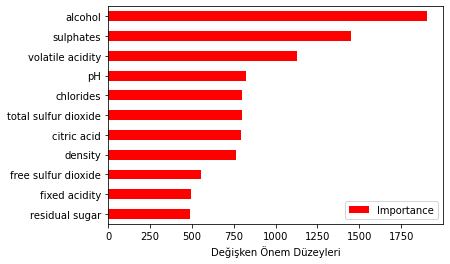

In [233]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [234]:
modeller = [
    
    knn_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(isimler + ":" )
    print(dogruluk)

----------------------------
KNeighborsRegressor:
0.6694351394197087
----------------------------
DecisionTreeRegressor:
0.6243867331378606
----------------------------
RandomForestRegressor:
0.5404122915466176
----------------------------
GradientBoostingRegressor:
0.5666339407402485
----------------------------
CatBoostRegressor:
0.547235069416251
----------------------------
XGBRegressor:
0.5348524522587411


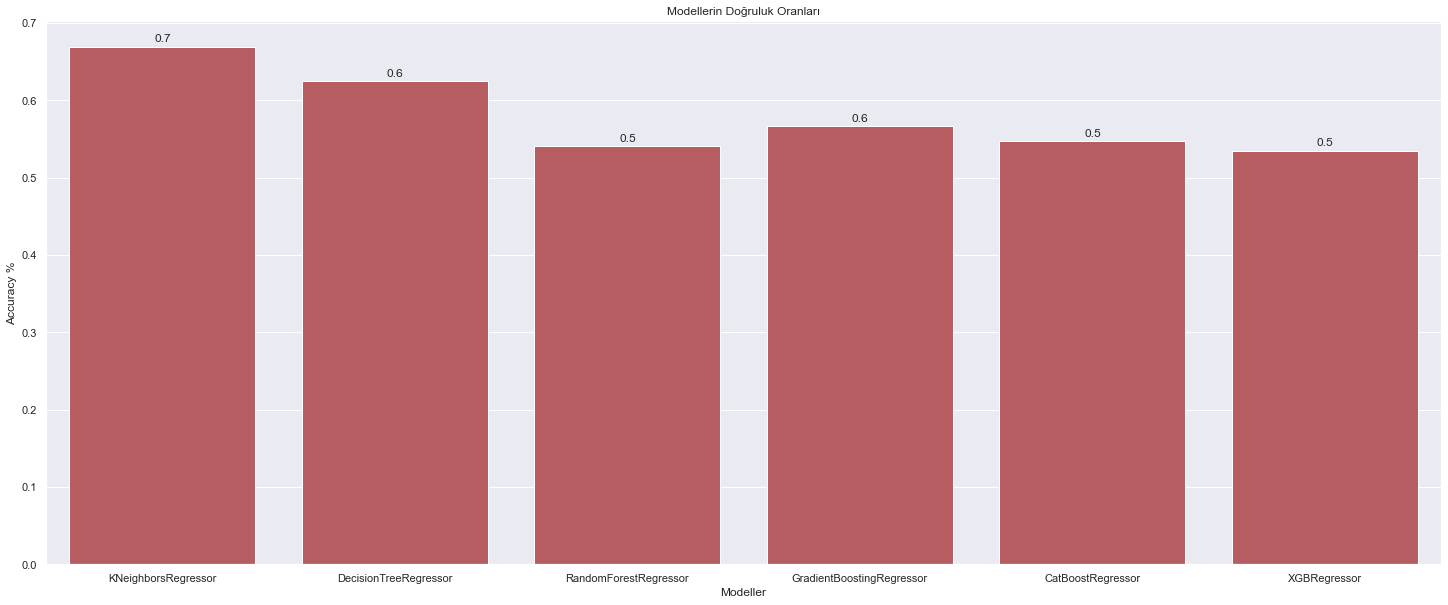

In [235]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = np.sqrt(mean_squared_error(y_test, y_pred))
    sonuc = pd.DataFrame([[isimler, dogruluk]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

sns.set(rc={'figure.figsize':(25,10)})    
plot=sns.barplot(x= 'Modeller', y = 'Accuracy', data=sonuclar, color="r")

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
plt.ylabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları'); 

In [236]:
#kulladığım tuned edilmiş modellerin çıktılarını ortak bir şekilde inceledim